In [1]:
import numpy as np                                  
import pandas as pd
import matplotlib.pyplot as plt        
import seaborn as sns                                                      
                          
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

from sklearn import datasets             
if Version(sklearn_version) < '0.18':                            
    from sklearn.cross_validation import train_test_split
else:                                
    from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
           
from decisionregion import plot_decision_regions

iris = datasets.load_iris()
df_iris = pd.DataFrame({'A':iris.data[:,0],'B':iris.data[:,1],'C':iris.data[:,2],'D':iris.data[:,3],'E':iris.target})
df_iris.columns = ["sepal length", "sepal width", "petal length", "petal width", "class label"]
X = df_iris.iloc[0:100, [0,2]].values
y = df_iris.iloc[0:100, 4].values
y = np.where(y==0 , -1, 1)

import linear_models as lm


## Adaline

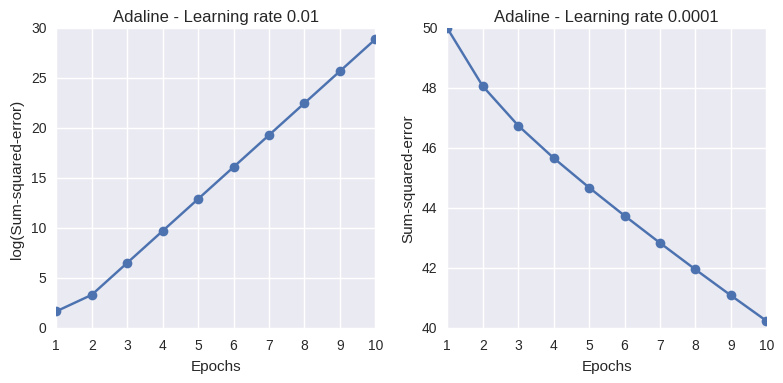

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = lm.AdalineGD(eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = lm.AdalineGD(eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

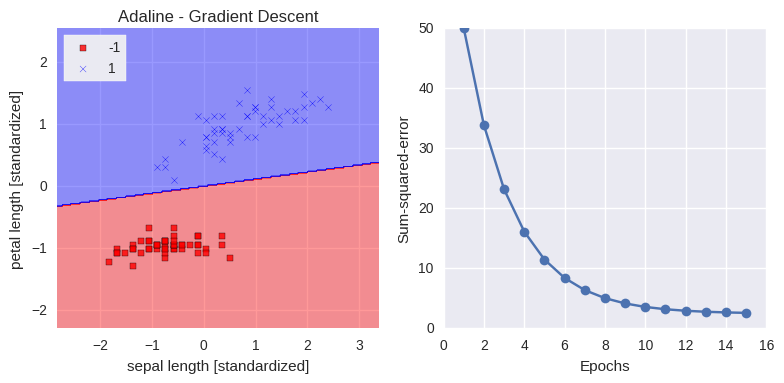

In [4]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = lm.AdalineGD(eta=0.01, n_iter=15)
ada.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

plot_decision_regions(X_std, y, classifier=ada, plt=ax[0])
ax[0].set_title('Adaline - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left',frameon=True)
#plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
#plt.show()

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

## Logistic Regression

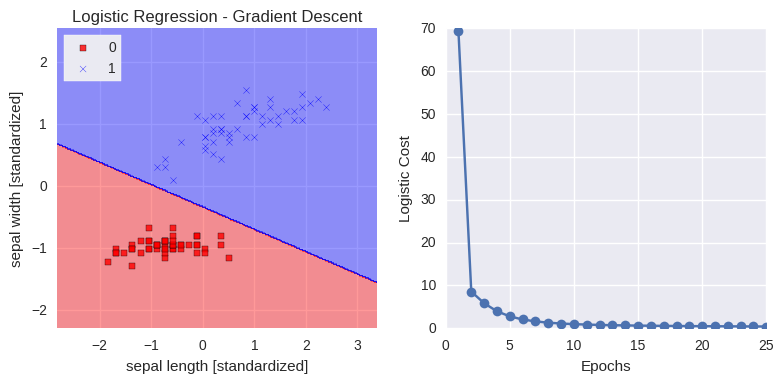

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

lr = lm.LogisticRegressionGD(eta=0.15, n_iter=25).fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plot_decision_regions(X_std, y, classifier=lr, plt=ax[0])
ax[0].set_title('Logistic Regression - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('sepal width [standardized]')
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Logistic Cost')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()